<a href="https://colab.research.google.com/github/shaileshsuthar675/Machine-Learning/blob/main/Survival%20Rate%20At%20Titanic/Survival_rate_at_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Built an algorithm to predict the person’s survival rate on the Titanic Ship...**

#Mounting the google drive with notebook

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#Enable the data table for better visualization

In [2]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

#Importing respective libraries

In [93]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Importing the respective dataset from drive

In [25]:
df=pd.read_csv('/content/gdrive/MyDrive/machine learning /titanic.csv')

#Data cleaning 

In [26]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
df=df.drop(columns=['Cabin','Embarked','Name','Ticket', 'Fare','PassengerId'],axis='columns')

In [28]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch'], dtype='object')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 41.9+ KB


In [30]:
df.Age=df.Age.fillna(df.Age.mean())

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 41.9+ KB


In [32]:
from sklearn.preprocessing import LabelEncoder
sex_encoding=LabelEncoder()
df.Sex=sex_encoding.fit_transform(df.Sex)

In [33]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


#Data visualization

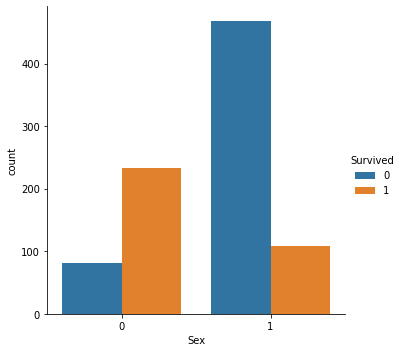

In [40]:
sns.catplot(data=df,x='Sex',hue='Survived',kind='count')

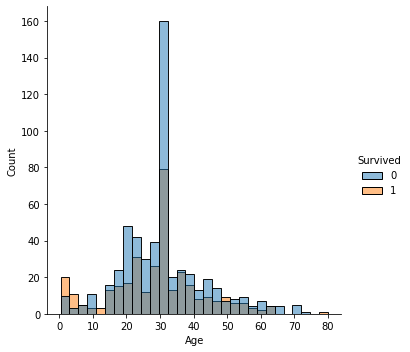

In [44]:
sns.displot(data=df,x='Age',hue='Survived')

#Creating a training and test datasets

In [87]:
x=df.drop(columns=['Survived'])
y=df.Survived
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#Developing a predictive model with GaussianNB

In [88]:
from sklearn.naive_bayes import GaussianNB
nb_model=GaussianNB()
nb_model.fit(x_train,y_train)
nb_model.score(x_test,y_test)

0.7821229050279329

In [65]:
from sklearn.model_selection import cross_val_score
cross_val_score(GaussianNB(),x_train,y_train)

array([0.8041958 , 0.73426573, 0.73943662, 0.72535211, 0.78873239])

#Developing a predictive model with DecisionTreeClassifier

In [83]:
from sklearn.tree import DecisionTreeClassifier
dct_model=DecisionTreeClassifier().fit(x_train,y_train)
dct_model.score(x_test,y_test)

0.8044692737430168

In [64]:
from sklearn.model_selection import cross_val_score
cross_val_score(DecisionTreeClassifier(),x_train,y_train)

array([0.81118881, 0.74125874, 0.77464789, 0.76056338, 0.82394366])

#Prediction...

In [100]:
def get_score(Pclass, Sex, Age, SibSp, Parch):
  x=dct_model.predict([[Pclass, Sex, Age, SibSp, Parch]])
  if x[0]==0:
    print("This Person might not survive at that time")
  print("This Person might survive at that time")

In [101]:
get_score(1,0,22,1,1)

This Person might survive at that time
